Here I will do a first batch of visualizations useful for the `covid19_stats.engine.viz2` documentation, which lives under [here](https://tanimislam.github.io/covid19_stats/api/api.html#covid19-stats-engine-viz2-module).

In [1]:
import os, sys, numpy, pylab, importlib, pickle, gzip, time, pandas
from covid19_stats.engine import core, gis, viz, viz2, find_plausible_maxnum
from covid19_stats import COVID19Database
from matplotlib.patches import Polygon
from itertools import chain
from nprstuff.core import autocrop_image
import cartopy.crs as ccrs
%matplotlib inline
importlib.reload( viz2 )

<module 'covid19_stats.engine.viz2' from '/usr/WS2/islam5/covid19_stats/covid19_stats/engine/viz2.py'>

Default directory to put visualizations, and incident data for NYC metro area and CONUS.

In [2]:
static_viz2_dir = '../docsrc/source/_static/viz2'
assert( os.path.isdir( static_viz2_dir ))
cdat = COVID19Database( )
data_nyc = core.get_msa_data( 'nyc')
inc_data_nyc = core.get_incident_data( data_nyc )
inc_data_conus = core.get_incident_data( COVID19Database.data_conus( ) )

Demonstrate `covid19_stats.engine.viz.plot_cases_or_deaths_bycounty` for the NYC Metro Area, 150 days after the first incident.

(10000, 1700)

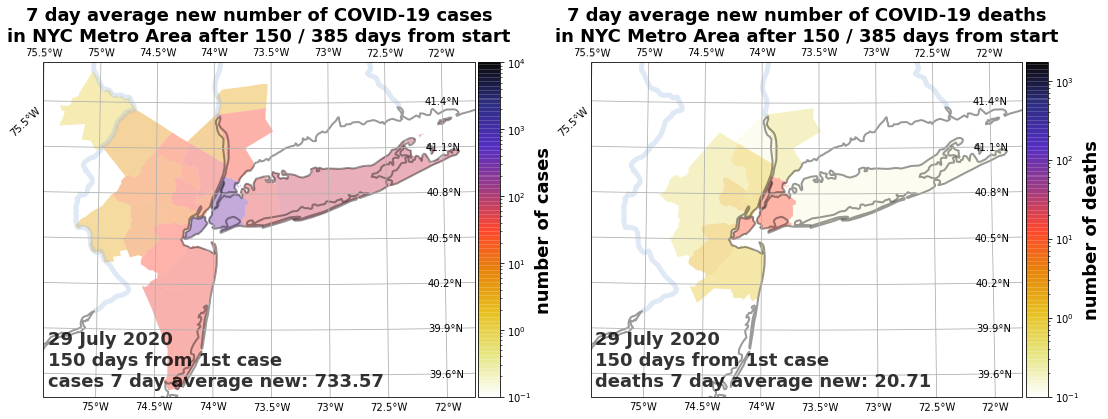

In [3]:
plot_artists_cases = { }
plot_artists_deaths = { }
fig = pylab.figure( )
fig.set_size_inches([18,12])
maxnum_death_7day_rate = max( list(map(lambda fips: inc_data_nyc[ 'df_7day'][ 'deaths_%s_7day_new' % fips ].max( ),
                                       inc_data_nyc[ 'fips'] ) ) )
maxnum_cases_7day_rate = max( list(map(lambda fips: inc_data_nyc[ 'df_7day'][ 'cases_%s_7day_new' % fips  ].max( ),
                                       inc_data_nyc[ 'fips'] ) ) )
maxnum_colorbar_death = find_plausible_maxnum( maxnum_death_7day_rate )
maxnum_colorbar_cases = find_plausible_maxnum( maxnum_cases_7day_rate )
viz2.plot_cases_or_deaths_rate_bycounty( inc_data_nyc, fig, type_disp='cases',
                                  days_from_beginning=150,  maxnum_colorbar=maxnum_colorbar_cases, doTitle=True,
                                  plot_artists=plot_artists_cases, rows=1, cols=2, num=1 )
viz2.plot_cases_or_deaths_rate_bycounty( inc_data_nyc, fig, type_disp='deaths',
                                  days_from_beginning=150,  maxnum_colorbar=maxnum_colorbar_death, doTitle=True,
                                  plot_artists=plot_artists_deaths, rows=1, cols=2, num=2 )
fig.savefig( os.path.join( static_viz2_dir, 'viz2_plot_cases_or_deaths_rate_bycounty_nyc.png'), bbox_inches = 'tight' )
autocrop_image.autocrop_image( os.path.join( static_viz2_dir, 'viz2_plot_cases_or_deaths_rate_bycounty_nyc.png') )
maxnum_colorbar_cases, maxnum_colorbar_death

(32000, 1700)

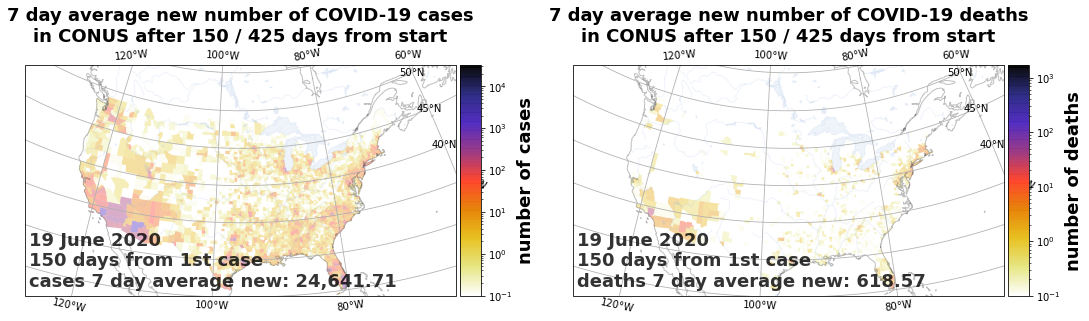

In [4]:
plot_artists_cases = { }
plot_artists_deaths = { }
fig = pylab.figure( )
fig.set_size_inches([18,12])
maxnum_death_7day_rate = max( list(map(lambda fips: inc_data_conus[ 'df_7day'][ 'deaths_%s_7day_new' % fips].max( ), inc_data_conus['fips'] ) ) )
maxnum_cases_7day_rate = max( list(map(lambda fips: inc_data_conus[ 'df_7day'][ 'cases_%s_7day_new' % fips].max( ), inc_data_conus['fips'] ) ) )
maxnum_colorbar_death = find_plausible_maxnum( maxnum_death_7day_rate )
maxnum_colorbar_cases = find_plausible_maxnum( maxnum_cases_7day_rate )
viz2.plot_cases_or_deaths_rate_bycounty( inc_data_conus, fig, type_disp='cases',
                                  days_from_beginning=150,  maxnum_colorbar=maxnum_colorbar_cases, doTitle=True,
                                  plot_artists=plot_artists_cases, rows=1, cols=2, num=1, doSmarter = True )
viz2.plot_cases_or_deaths_rate_bycounty( inc_data_conus, fig, type_disp='deaths',
                                  days_from_beginning=150,  maxnum_colorbar=maxnum_colorbar_death, doTitle=True,
                                  plot_artists=plot_artists_deaths, rows=1, cols=2, num=2, doSmarter = True )
fig.savefig( os.path.join( static_viz2_dir, 'viz2_plot_cases_or_deaths_rate_bycounty_conus.png'), bbox_inches = 'tight' )
autocrop_image.autocrop_image( os.path.join( static_viz2_dir, 'viz2_plot_cases_or_deaths_rate_bycounty_conus.png') )
maxnum_colorbar_cases, maxnum_colorbar_death

Demonstrate `covid19_stats.engine.viz2.plot_cases_deaths_rate_region` for the NYC Metro Area, 150 days after the first incident.

True

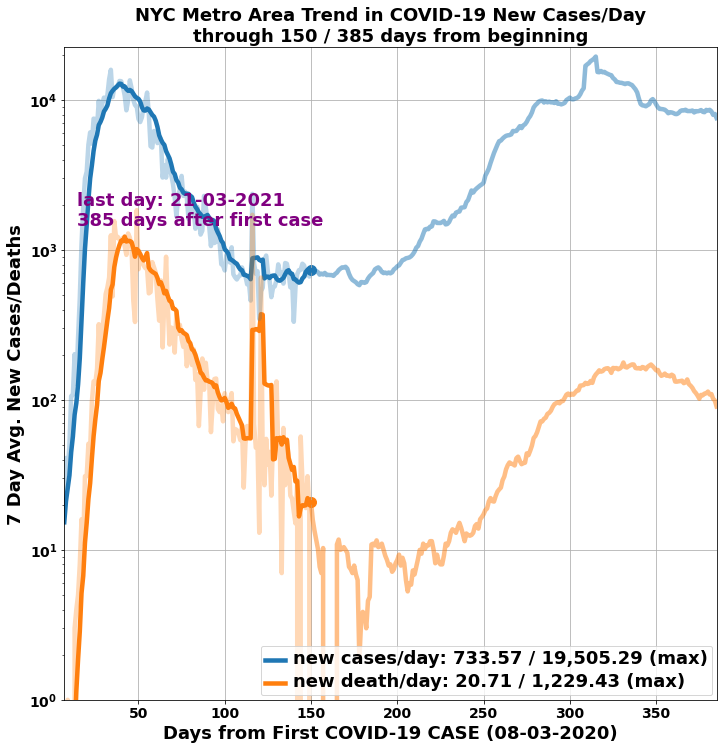

In [5]:
fig = pylab.figure( )
fig.set_size_inches([18,12])
ax = fig.add_subplot(111)
viz2.plot_cases_deaths_rate_region( inc_data_nyc, ax, days_from_beginning=150, doTitle=True)
fig.savefig( os.path.join( static_viz2_dir, 'viz2_plot_cases_deaths_rate_region_nyc.png'))
autocrop_image.autocrop_image( os.path.join( static_viz2_dir, 'viz2_plot_cases_deaths_rate_region_nyc.png'))

Demonstrate `covid19_stats.engine.viz2.create_plots_rate_daysfrombeginning` for the NYC Metro Area, 150 days after the first incident. No actual visualization because it spits out to a file

In [6]:
importlib.reload( viz2 )
fnames = viz2.create_plots_rate_daysfrombeginning(
    inc_data_nyc, dirname = static_viz2_dir, days_from_beginning=[ 150, ] )
fnames

['../docsrc/source/_static/viz2/covid19_7day_nyc_LATEST.0143.png']

Demonstrate `covid19_stats.engine.viz2.create_summary_cases_or_deaths_rate_movie_frombeginning` for the NYC Metro Area. No actual visualization because it spits out to files.

In [9]:
time0 = time.time( )
cases_mp4_file = viz2.create_summary_cases_or_deaths_rate_movie_frombeginning(
    inc_data_nyc, dirname = static_viz2_dir, type_disp = 'cases' )
death2_mp4_file = viz2.create_summary_cases_or_deaths_rate_movie_frombeginning(
    inc_data_nyc, dirname = static_viz2_dir, type_disp = 'deaths' )
print( 'took %0.3f seconds to create cases and deaths movie for NYC' % ( time.time( ) - time0 ) )

took 57.099 seconds to create cases and deaths movie for NYC


In [10]:
%%HTML
<video width="100%" controls>
    <source src="../docsrc/source/_static/viz2/covid19_7day_nyc_cases_LATEST.mp4" type="video/mp4">
</video>

Demonstrate `covid19_stats.engine.viz2.create_summary_rate_movie_frombeginning` for the NYC Metro Area. No actual visualization because it spits out to files.

In [13]:
time0 = time.time( )
all_mp4_file = viz2.create_summary_rate_movie_frombeginning(
    inc_data_nyc, dirname = static_viz2_dir )
print( 'took %0.3f seconds to create ALL movie for NYC' % ( time.time( ) - time0 ) )

took 48.278 seconds to create ALL movie for NYC


In [8]:
%%HTML
<video width="100%" controls>
    <source src="../docsrc/source/_static/viz2/covid19_7day_nyc_LATEST.mp4" type="video/mp4">
</video>

Demonstrate `covid19_stats.engine.viz2.get_summary_demo_data` for the NYC Metro Area. No actual visualization because it spits out to files.

In [12]:
viz2.get_summary_demo_rate_data( inc_data_nyc, dirname = static_viz2_dir, store_data = True) # FIXME